In [1]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#import Dataset
df = pd.read_csv("C:/Users/Dell/Downloads/car_insurance.csv")
df

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,0-9y,high school,upper class,0.629027,1,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,0-9y,none,poverty,0.357757,0,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,0-9y,high school,working class,0.493146,1,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,0-9y,university,working class,0.206013,1,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,10-19y,none,working class,0.388366,1,0,0,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,10-19y,university,upper class,0.582787,1,0,0,10238,16000.0,sedan,0,0,1,0
9996,910346,26-39,female,10-19y,none,middle class,0.522231,1,0,1,32765,NaN,sedan,1,0,0,0
9997,468409,26-39,male,0-9y,high school,middle class,0.470940,1,0,1,10238,14000.0,sedan,0,0,0,0
9998,903459,26-39,female,10-19y,high school,poverty,0.364185,0,0,1,10238,13000.0,sedan,2,0,1,1


In [3]:
print(df.columns)

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   MARRIED              10000 non-null  int64  
 9   CHILDREN             10000 non-null  int64  
 10  POSTAL_CODE          10000 non-null  int64  
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  object 
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [5]:
df.isnull ()
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [6]:
#number of entries
num_entries = df.shape[0]
# Print the number of entries
print("Number of entries:", num_entries)

Number of entries: 10000


In [7]:
import pandas as pd
from sklearn.impute import KNNImputer

columns_to_fill = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']

# Create an instance of the KNNImputer with k=3
imputer = KNNImputer(n_neighbors=3)

# Fill the missing values using KNN imputer
df[columns_to_fill] = imputer.fit_transform(df[columns_to_fill])

In [8]:
df.drop(['ID','POSTAL_CODE','EDUCATION'], axis=1, inplace=True)

In [9]:
df['INCOME'] = df['INCOME'].replace({'upper class': 0, 'working class': 1 ,'poverty': 2})

In [10]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == 'object':
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df.dtypes 

AGE                      int32
GENDER                   int32
DRIVING_EXPERIENCE       int32
INCOME                   int32
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
MARRIED                  int64
CHILDREN                 int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE             int32
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
dtype: object

In [11]:
df.to_csv('CAR-cleaned.csv', index=False)

## Logistic Regression

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1367
           1       0.69      0.58      0.63       633

    accuracy                           0.79      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.78      0.79      0.78      2000

Confusion Matrix:
[[1204  163]
 [ 266  367]]


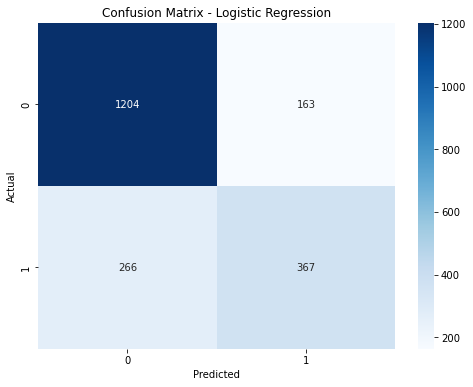

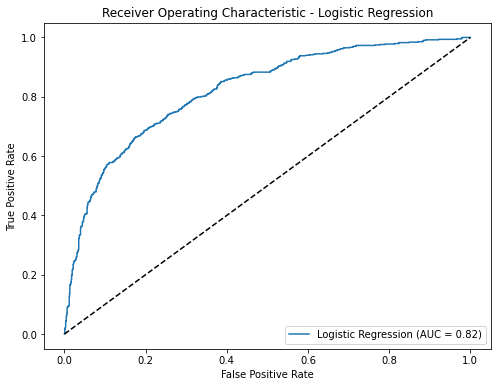

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,classification_report


# Prepare the data
y = df[['OUTCOME']]
X = df.drop(['OUTCOME'],axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Calculate the probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [13]:
import statsmodels.api as sm

# Step 2: Prepare the data
X = df.drop(columns=['OUTCOME'])
y = df['OUTCOME']

# Step 3: Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Step 4: Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Step 5: Print the OLS report
print(results.summary())

# Get the feature variables and their coefficients
feature_variables = X.columns.tolist()
coefficients = results.params.tolist()

# Print the feature variables and their coefficients
for variable, coefficient in zip(feature_variables, coefficients):
    print(f"{variable}: {coefficient}")

                            OLS Regression Results                            
Dep. Variable:                OUTCOME   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     432.3
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:17:59   Log-Likelihood:                -4275.0
No. Observations:               10000   AIC:                             8578.
Df Residuals:                    9986   BIC:                             8679.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7593    

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Gradient Boosting Model

Gradient Boosting Classifier Accuracy: 0.7995
Confusion Matrix:
[[1199  168]
 [ 233  400]]


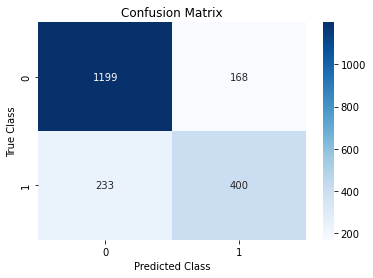

ROC AUC Score: 0.7545073389798581


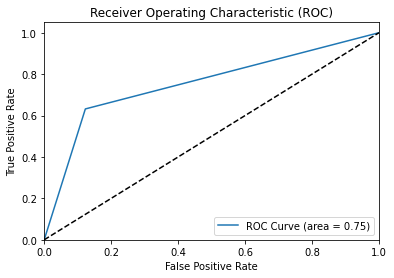

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1367
           1       0.70      0.63      0.67       633

    accuracy                           0.80      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.80      0.80      0.80      2000



In [14]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve


# Prepare the data
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=1000, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set using the Gradient Boosting Classifier
gb_predictions = gb_model.predict(X_test)

# Calculate accuracy of the Gradient Boosting Classifier
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

confusion_mat = confusion_matrix(y_test, gb_predictions)
print("Confusion Matrix:")
print(confusion_mat)

sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, gb_predictions)
print("ROC AUC Score:", roc_auc)

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, gb_predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, gb_predictions)
print("Classification Report:")
print(classification_rep)

## Random Forest Model

Random Forest Classifier Accuracy: 0.7865
Confusion Matrix:
[[1194  173]
 [ 254  379]]


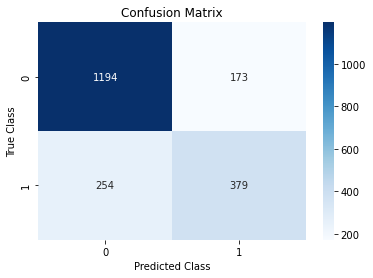

ROC AUC Score: 0.7360908390162612


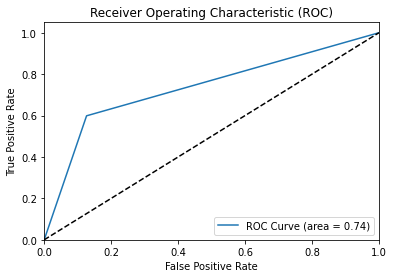

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1367
           1       0.69      0.60      0.64       633

    accuracy                           0.79      2000
   macro avg       0.76      0.74      0.74      2000
weighted avg       0.78      0.79      0.78      2000



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Prepare the data
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set using the Random Forest Classifier
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy of the Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, rf_predictions)
print("ROC AUC Score:", roc_auc)

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Generate the classification report
classification_rep = classification_report(y_test, rf_predictions)
print("Classification Report:")
print(classification_rep) 

## Model Comparision 

Logistic Regression Accuracy: 0.7855
Gradient Boosting Accuracy: 0.7995
Random Forest Accuracy: 0.7865


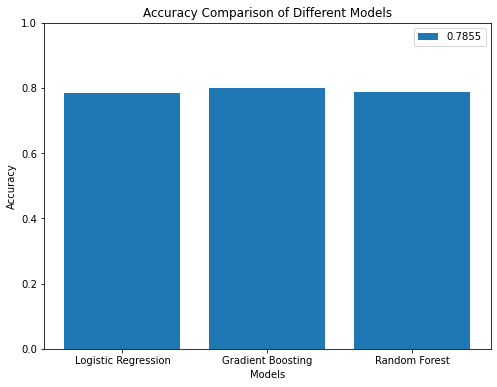

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42)
}

accuracies = []

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

# Create a bar chart to compare accuracies
plt.figure(figsize=(8, 6))
plt.bar(models.keys(), accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.0, 1.0)

# Add a legend
plt.legend(accuracies)

plt.show()